# Testowanie metod numerycznych 
spróbujemy rozwiązać równanie dy/dx = -y dla y(0) = 1 za pomocą metody jawnej eulera

In [1]:
using Plots

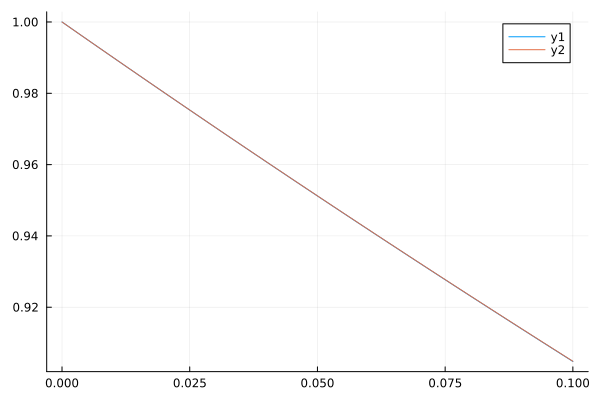

In [3]:
function f(x,y)     #the right hand of our equation
    return -y
end

function δy(x₀,y₀,h)    #eulers forward method
    y = y₀ + h*f(x₀,y₀)
    return y
end

#points in our grid
xs = Float64[0]   
ys = Float64[1]
h = 0.001

# xₙ = tab[1][1]
# yₙ = tab[1][2]

# typeof((xₙ + h, δy(xₙ,yₙ,h)))

for i in range(1,100)
    xₙ = xs[i]
    yₙ = ys[i]
    append!(xs,[xₙ + h])
    append!(ys,[δy(xₙ,yₙ,h)])
end

y = exp.(-xs)

plot(xs,ys)
plot!(xs,y)



jak widać wyszło praktycznie to samo
ale kiedy to faktycznie może być użyte?


# Scenariusz naszego problemu

Rozważymy praktyczny przykład: <br>
Mamy magazyn którego maksymalna pojemność wynosi 10 000 jednostek
Nasz początkowy stan magazynu ustawimy na 7 000 jednostek (może być też 10 000) <br>
Na jedną jednostę czasu t (1 dzień, miesiąc, dowolne) będzie usuwane 500 jednostek z magazynu <br>
Naszym docelowym stanem będzie pełny magazyn (na pewno?) <br>
Jaki musi być order-rate, aby spełnić zapotrzebowania i doprowadzić magazyn do żądanego stanu?


In [4]:
#initial conditions
I₀ = 7000
Iₜ = 10000
D₁ = 500
T = 5 #relaxation 

function Order(I)
    return (Iₜ-I)/T
end

function dI(O)
    return O - D₁
end

dI (generic function with 1 method)

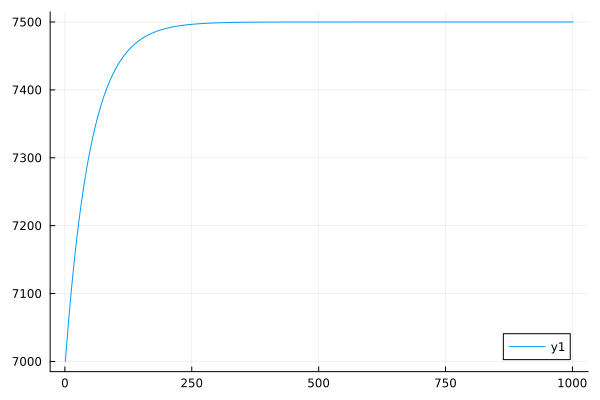

In [21]:
# tables for each step in t
array_I = Float64[7000]
array_O = Float64[Order(array_I[1])]   #additional, not necesery in calculations
h=0.001
  
function δi(y₀)    #eulers forward method
    y = y₀ + h*dI(Order(y₀))
    return y
end

#we will approximate a 100 times with h until we get to the next t    
#we will go on until t = 1000   

for i in range(1,1000)
    y = last(array_I)
    for i in range(1,100)
        y = δi(y)
    end
    append!(array_I,y)
    append!(array_O,Order(y))
end

#lets see how the state of the inventory behaves
plot(range(1,1001),array_I)





      

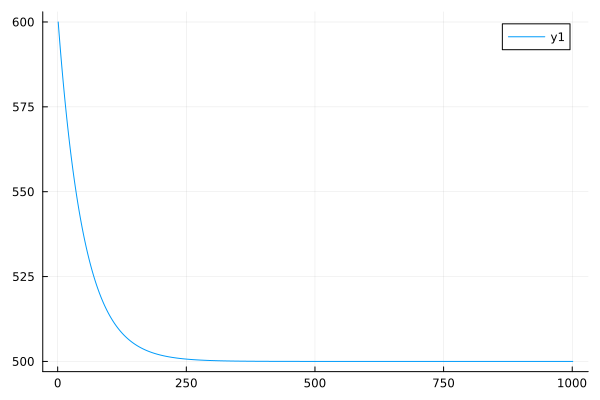

In [22]:
#this will show us how the demand rate changes over time
plot(range(1,1001),array_O) 